# Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
# оставляем только два вида ирисов для бинарной классификации (изначально было три)
df = df[df['species'] != 'virginica']

In [17]:
df.head()

,petal_length,sepal_width,species
43,1.6,3.5,0
85,4.5,3.4,1
4,1.4,3.6,0
76,4.8,2.8,1
52,4.9,3.1,1


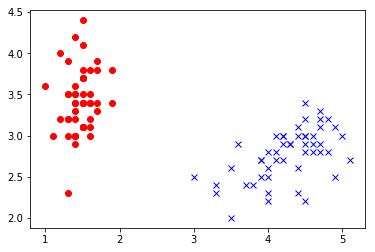

In [6]:
# визуализируем данные для setosa красным
x_setosa = df[df['species'] == 'setosa']['petal_length']
y_setosa = df[df['species'] == 'setosa']['sepal_width']
plt.plot(x_setosa, y_setosa, 'ro')

# визуализируем данные для versicolor красным
x_versicolor = df[df['species'] == 'versicolor']['petal_length']
y_versicolor = df[df['species'] == 'versicolor']['sepal_width']
plt.plot(x_versicolor, y_versicolor, 'bx')

plt.show()

In [16]:
x_setosa

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    1.1
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    1.0
23    1.7
24    1.9
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.5
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    1.9
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal_length, dtype: float64

In [7]:
df = df[['petal_length', 'sepal_width', 'species']] # оставляем только два параметра
df = df.sample(frac=1) # перемешиваем данные
df['species'] = df['species'].astype('category').cat.codes # кодируем setosa и versicolor как 0 и 1
df.head()

,petal_length,sepal_width,species
43,1.6,3.5,0
85,4.5,3.4,1
4,1.4,3.6,0
76,4.8,2.8,1
52,4.9,3.1,1


In [9]:
# отделяем features и labels
X = np.array(df[['petal_length', 'sepal_width']].T, dtype=np.float128)
Y = np.array(df['species'], dtype=np.float128)
Y = np.reshape(Y, (1, 100))
print(X.shape)
print(Y.shape)

(2, 100)
(1, 100)


## Net input

$$ z = \sum{wx} + b $$

In [156]:
def net_input(W, X, b):
    return np.dot(W, X) + b

## Sigmoid

$$ f(z) = \frac{1}{1 + e^{-z}} $$

In [157]:
def sigmoid(Z):
    return 1.0/(1 + np.exp(-Z))

## Predict

Предсказываем класс 1, если модель уверена в ответе "1" более, чем на 50%, иначе 0.

In [158]:
def predict(s):
    if s > 0.5:
        return 1
    else:
        return 0

## Cost function

$$ L(\hat{y}, y) = - \frac{1}{m} \sum{y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}}$$

In [159]:
def cost_function(W, X, b, Y):
    return -np.sum(Y * np.log(sigmoid(net_input(W, X, b))) + (1 - Y) * np.log(1 - sigmoid(net_input(W, X, b)))) / X.shape[1]

## Производные

$$ \frac{\partial L}{\partial w} = \frac{1}{m} \sum{(\hat{y} - y) x} $$

In [160]:
def cost_function_derivative_w(W, X, b, Y):
    return np.dot(sigmoid(net_input(W, X, b)) - Y, X.T) / X.shape[1]

$$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum{(\hat{y} - y)} $$

In [161]:
def cost_function_derivative_b(W, X, b, Y):
    return np.sum(sigmoid(net_input(W, X, b)) - Y) / X.shape[1]

## Accuracy

Доля правильно предсказанных ответов

In [14]:
def accuracy(Y_hat, Y):
    return np.sum(Y_hat == Y) / Y.shape[1]

In [163]:
print(X.shape)
print(Y.shape)

W = np.zeros((1, X.shape[0]))
b = 0

NUM_ITERATIONS = 1000
LEARNING_RATE = 10e-2

for i in range(NUM_ITERATIONS):
    print('{} step'.format(i))
    print(cost_function(W, X, b, Y))
    W = W - LEARNING_RATE * cost_function_derivative_w(W, X, b, Y)
    b = b - LEARNING_RATE * cost_function_derivative_b(W, X, b, Y)
    Y_pred = np.array([1 if sigmoid(net_input(W, x, b)) > 0.5 else 0 for x in X.T])
    print('Accuracy: {}'.format(accuracy(Y_pred, Y)))
    
print(sigmoid(net_input(W, X, b)))

(2, 100)
(1, 100)
0 step
0.69314718055994530943
Accuracy: 0.5
1 step
0.6457149021679252497
Accuracy: 0.55
2 step
0.60893873643935412734
Accuracy: 0.81
3 step
0.57692325140197892107
Accuracy: 0.97
4 step
0.54790289316047079485
Accuracy: 1.0
5 step
0.52124576496158925564
Accuracy: 1.0
6 step
0.49664181830107476592
Accuracy: 1.0
7 step
0.47388174019744518222
Accuracy: 1.0
8 step
0.45279509317685252785
Accuracy: 1.0
9 step
0.43323226970116351963
Accuracy: 1.0
10 step
0.41505871562474464908
Accuracy: 1.0
11 step
0.39815262593864231348
Accuracy: 1.0
12 step
0.38240363032097719948
Accuracy: 1.0
13 step
0.36771177054076421343
Accuracy: 1.0
14 step
0.35398658104343821686
Accuracy: 1.0
15 step
0.34114622825934329012
Accuracy: 1.0
16 step
0.32911670281140273112
Accuracy: 1.0
17 step
0.3178310670792491704
Accuracy: 1.0
18 step
0.3072287605817555834
Accuracy: 1.0
19 step
0.29725496384330923045
Accuracy: 1.0
20 step
0.28786001963418790414
Accuracy: 1.0
21 step
0.27899890914901470939
Accuracy: 1.0
22

Accuracy: 1.0
185 step
0.04496516881404879727
Accuracy: 1.0
186 step
0.044742980457582328083
Accuracy: 1.0
187 step
0.044523065928412307738
Accuracy: 1.0
188 step
0.04430539031318174704
Accuracy: 1.0
189 step
0.044089919409395004336
Accuracy: 1.0
190 step
0.043876619707452522343
Accuracy: 1.0
191 step
0.043665458373226320632
Accuracy: 1.0
192 step
0.043456403231157398332
Accuracy: 1.0
193 step
0.043249422747856947074
Accuracy: 1.0
194 step
0.04304448601619398539
Accuracy: 1.0
195 step
0.042841562739852707555
Accuracy: 1.0
196 step
0.042640623218343489833
Accuracy: 1.0
197 step
0.042441638332452120475
Accuracy: 1.0
198 step
0.04224457953011241493
Accuracy: 1.0
199 step
0.042049418812687948225
Accuracy: 1.0
200 step
0.041856128721649181675
Accuracy: 1.0
201 step
0.041664682325632783575
Accuracy: 1.0
202 step
0.041475053207870443148
Accuracy: 1.0
203 step
0.041287215453974956816
Accuracy: 1.0
204 step
0.04110114364007182336
Accuracy: 1.0
205 step
0.040916812821265025108
Accuracy: 1.0
206 

Accuracy: 1.0
372 step
0.02368075511461690791
Accuracy: 1.0
373 step
0.023622664766431678517
Accuracy: 1.0
374 step
0.023564874109811291942
Accuracy: 1.0
375 step
0.023507380804034176798
Accuracy: 1.0
376 step
0.023450182532789134402
Accuracy: 1.0
377 step
0.023393277003857500616
Accuracy: 1.0
378 step
0.023336661948800262875
Accuracy: 1.0
379 step
0.02328033512265004235
Accuracy: 1.0
380 step
0.023224294303607853348
Accuracy: 1.0
381 step
0.0231685372927445536
Accuracy: 1.0
382 step
0.023113061913706901215
Accuracy: 1.0
383 step
0.023057866012428135341
Accuracy: 1.0
384 step
0.023002947456842999748
Accuracy: 1.0
385 step
0.022948304136607129902
Accuracy: 1.0
386 step
0.022893933962820725617
Accuracy: 1.0
387 step
0.022839834867756433544
Accuracy: 1.0
388 step
0.022786004804591364319
Accuracy: 1.0
389 step
0.02273244174714317174
Accuracy: 1.0
390 step
0.022679143689610122084
Accuracy: 1.0
391 step
0.022626108646315083428
Accuracy: 1.0
392 step
0.022573334651453366123
Accuracy: 1.0
393 

Accuracy: 1.0
558 step
0.016361025402274333327
Accuracy: 1.0
559 step
0.016334426073102506366
Accuracy: 1.0
560 step
0.016307918280775138578
Accuracy: 1.0
561 step
0.016281501546715324015
Accuracy: 1.0
562 step
0.016255175395695441555
Accuracy: 1.0
563 step
0.016228939355807828547
Accuracy: 1.0
564 step
0.01620279295843576247
Accuracy: 1.0
565 step
0.016176735738224746782
Accuracy: 1.0
566 step
0.016150767233054097374
Accuracy: 1.0
567 step
0.01612488698400882584
Accuracy: 1.0
568 step
0.016099094535351815942
Accuracy: 1.0
569 step
0.016073389434496289851
Accuracy: 1.0
570 step
0.016047771231978560506
Accuracy: 1.0
571 step
0.016022239481431066636
Accuracy: 1.0
572 step
0.01599679373955568713
Accuracy: 1.0
573 step
0.015971433566097331226
Accuracy: 1.0
574 step
0.015946158523817801416
Accuracy: 1.0
575 step
0.015920968178469925532
Accuracy: 1.0
576 step
0.015895862098771954921
Accuracy: 1.0
577 step
0.01587083985638222559
Accuracy: 1.0
578 step
0.015845901025874078997
Accuracy: 1.0
579

Accuracy: 1.0
749 step
0.012529922265957860503
Accuracy: 1.0
750 step
0.012514823444505495809
Accuracy: 1.0
751 step
0.012499763284985077296
Accuracy: 1.0
752 step
0.0124847416366835539325
Accuracy: 1.0
753 step
0.012469758349675426487
Accuracy: 1.0
754 step
0.012454813274817592819
Accuracy: 1.0
755 step
0.0124399062637442336935
Accuracy: 1.0
756 step
0.012425037168861738714
Accuracy: 1.0
757 step
0.012410205843343672047
Accuracy: 1.0
758 step
0.012395412141125777513
Accuracy: 1.0
759 step
0.012380655916901022747
Accuracy: 1.0
760 step
0.012365937026114682067
Accuracy: 1.0
761 step
0.01235125532495945769
Accuracy: 1.0
762 step
0.0123366106703706388574
Accuracy: 1.0
763 step
0.01232200292002129869
Accuracy: 1.0
764 step
0.012307431932317528341
Accuracy: 1.0
765 step
0.01229289756639370805
Accuracy: 1.0
766 step
0.012278399682107814896
Accuracy: 1.0
767 step
0.012263938140036766806
Accuracy: 1.0
768 step
0.012249512801471802576
Accuracy: 1.0
769 step
0.012235123528413897514
Accuracy: 1.0

Accuracy: 1.0
934 step
0.010268264602505613579
Accuracy: 1.0
935 step
0.0102583815123665906626
Accuracy: 1.0
936 step
0.010248518686286179279
Accuracy: 1.0
937 step
0.0102386760609253257895
Accuracy: 1.0
938 step
0.010228853573210601236
Accuracy: 1.0
939 step
0.0102190511603328050646
Accuracy: 1.0
940 step
0.010209268759745577658
Accuracy: 1.0
941 step
0.010199506309164021697
Accuracy: 1.0
942 step
0.010189763746563332123
Accuracy: 1.0
943 step
0.010180041010177434786
Accuracy: 1.0
944 step
0.010170338038497633599
Accuracy: 1.0
945 step
0.010160654770271266264
Accuracy: 1.0
946 step
0.010150991144500368337
Accuracy: 1.0
947 step
0.010141347100440345761
Accuracy: 1.0
948 step
0.010131722577598655683
Accuracy: 1.0
949 step
0.01012211751573349545
Accuracy: 1.0
950 step
0.010112531854852499903
Accuracy: 1.0
951 step
0.010102965535211446758
Accuracy: 1.0
952 step
0.010093418497312970057
Accuracy: 1.0
953 step
0.010083890681905281617
Accuracy: 1.0
954 step
0.0100743820299809004384
Accuracy: 

## Scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression()
clf.fit(X.T, Y.T)

/Users/bsalyp/env_python/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
X.T

array([[1.6, 3.5],
       [4.5, 3.4],
       [1.4, 3.6],
       [4.8, 2.8],
       [4.9, 3.1],
       [1.3, 3.5],
       [1.6, 3.2],
       [3.9, 2.7],
       [4.1, 2.7],
       [1.6, 3.8],
       [4.8, 3.2],
       [5.1, 2.7],
       [4.7, 3.3],
       [1.5, 3.1],
       [4.3, 2.9],
       [1.5, 3.1],
       [4.1, 3. ],
       [1.3, 2.3],
       [4. , 2.8],
       [3.6, 2.9],
       [1.3, 3.9],
       [3.5, 2. ],
       [4.5, 3. ],
       [1.4, 2.9],
       [1.1, 3. ],
       [4.6, 3. ],
       [1.5, 3.5],
       [1.5, 3.7],
       [3.9, 2.7],
       [4.7, 3.1],
       [4. , 2.5],
       [1.4, 3. ],
       [4.7, 3.2],
       [1.5, 3.4],
       [1.2, 3.2],
       [3.5, 2.6],
       [4.2, 2.7],
       [1.4, 3. ],
       [1.9, 3.4],
       [1.6, 3.1],
       [1.6, 3.4],
       [1.7, 3.3],
       [1.5, 4.1],
       [4.7, 2.8],
       [4.5, 3.2],
       [1.4, 3.2],
       [4. , 2.3],
       [1.5, 4.4],
       [4.4, 2.6],
       [1.4, 3.5],
       [4.1, 2.8],
       [1.2, 4. ],
       [4.4,

In [22]:
y_pred = clf.predict([1, 500, 6.5])

In [23]:
y_pred

array([0.], dtype=float128)